In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import fipy as fp

from fvm_utils import *

# Accessing meshed Census data

Decennial census data that has been saved as a fipy CellVariable can be found at:

`/project/vitelli/dsseara/schelling/data/decennial/meshed`

In [2]:
census_dir = "/project/vitelli/dsseara/schelling/data/decennial"
meshed_folders = sorted(glob(os.path.join(census_dir, "meshed", "*")))

# take a look at Cook County
county_folder = [folder for folder in meshed_folders if "Illinois_Cook" in folder][0]

Inside of each folder are a number of `.fipy` files that each contain the following information:
```python
    white
    white_county
    black
    black_county
    hispanic
    hispanic_county
    aapi
    aapi_county
    total
    total_county
    mesh
    mesh_county
    year
```
- `demo_county` is a `fipy` `CellVariable` with that demographic's population numbers in a specific county
- `demo` contains information for the county and the region surrounding that county.
- `mesh` and `mesh_county` are the `Gmsh()` objects that each demo uses
- `year` is the year from which the data is taken.


In [3]:
fipy_files = sorted(glob(os.path.join(county_folder, "*")))

/project/vitelli/dsseara/anaconda/fipy+pytorch/lib/python3.12/site-packages/fipy/variables/variable.py:1141: RuntimeWarning: invalid value encountered in divide
  return self._BinaryOperatorVariable(lambda a, b: a / b, other)


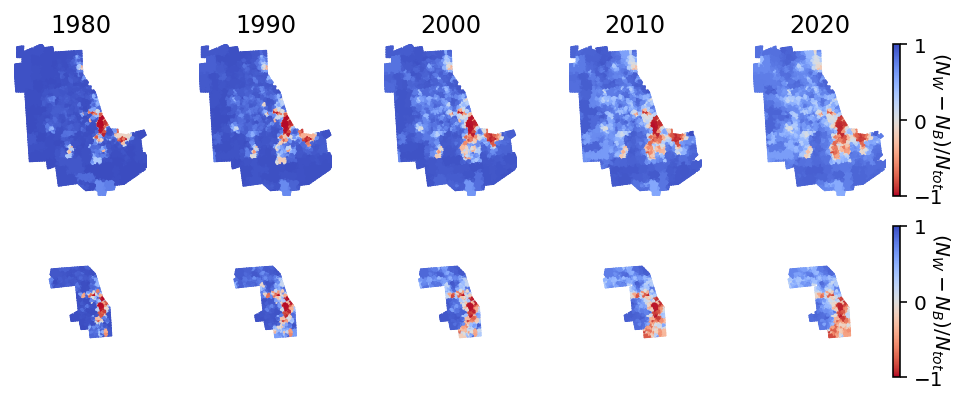

In [4]:
fig, ax = plt.subplots(2, len(fipy_files), dpi=144, figsize=(8, 3),
                       sharey=True, sharex=True)

for fidx, fipy_file in enumerate(fipy_files):
    data = fp.tools.dump.read(fipy_file)
    [white, white_county,
     black, black_county,
     hispanic, hispanic_county,
     aapi, aapi_county,
     total, total_county,
     mesh, mesh_county, year] = data
    
    plot_mesh((white-black)/total, mesh, ax=ax[0, fidx],
              vmin=-1, vmax=1, cmap=plt.cm.coolwarm_r,
              colorbar=(fidx==len(fipy_files)-1), colorbar_title=r"$(N_W - N_B)/N_{tot}$")
    
    plot_mesh((white_county-black_county)/total_county, mesh_county, ax=ax[1, fidx],
              vmin=-1, vmax=1, cmap=plt.cm.coolwarm_r,
              colorbar=(fidx==len(fipy_files)-1), colorbar_title=r"$(N_W - N_B)/N_{tot}$")

    ax[0, fidx].set(title=year)

for a in fig.axes:
    xmin, ymin = mesh.extents["min"]
    xmax, ymax = mesh.extents["max"]
    a.set(xlim=[xmin, xmax], ylim=[ymin, ymax])
    a.axis('off')
    
    

# Accessing meshed ACS data

Similarly, yearly ACS data can be accessed at:

`/project/vitelli/dsseara/schelling/data/yearly/raw/meshed`

In [5]:
acs_folder = "/project/vitelli/dsseara/schelling/data/yearly/raw/"
meshed_folders = sorted(glob(os.path.join(acs_folder, "meshed", "*")))

# take a look at Cook County
county_folder = [folder for folder in meshed_folders if "Illinois_Cook" in folder][0]

In [6]:
fipy_files = sorted(glob(os.path.join(county_folder, "*")))

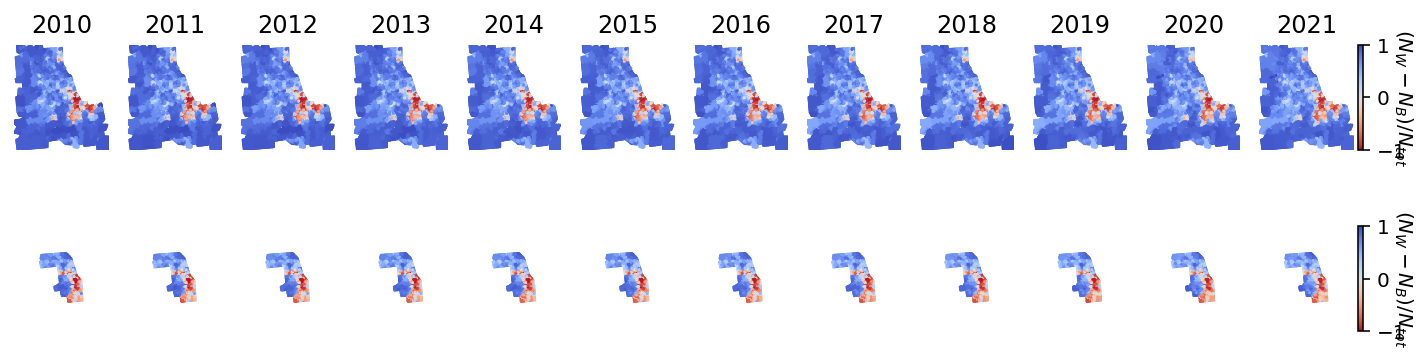

In [7]:
fig, ax = plt.subplots(2, len(fipy_files), dpi=144, figsize=(12, 3),
                       sharey=True, sharex=True)

for fidx, fipy_file in enumerate(fipy_files):
    data = fp.tools.dump.read(fipy_file)
    [white, white_county,
     black, black_county,
     hispanic, hispanic_county,
     aapi, aapi_county,
     total, total_county,
     mesh, mesh_county, year] = data

    plot_mesh((white-black)/total, mesh, ax=ax[0, fidx],
              vmin=-1, vmax=1, cmap=plt.cm.coolwarm_r,
              colorbar=(fidx==len(fipy_files)-1), colorbar_title=r"$(N_W - N_B)/N_{tot}$")
    
    plot_mesh((white_county-black_county)/total_county, mesh_county, ax=ax[1, fidx],
              vmin=-1, vmax=1, cmap=plt.cm.coolwarm_r,
              colorbar=(fidx==len(fipy_files)-1), colorbar_title=r"$(N_W - N_B)/N_{tot}$")
    ax[0, fidx].set(title=year)
    

for a in fig.axes:
    xmin, ymin = mesh.extents["min"]
    xmax, ymax = mesh.extents["max"]
    a.set(xlim=[xmin, xmax], ylim=[ymin, ymax])
    a.axis('off')